<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37 - Part 1: Data Exploration & Preprocessing</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

---
## Table of Contents

1. [Identifying Business Needs](#1-business)
2. [Setup & Data Loading](#2-setup)
3. [Data Exploration](#3-exploration)
4. [Data Cleaning](#4-cleaning)
5. [Missing Data Treatment](#5-missing)
6. [Outlier Detection](#6-outliers)
7. [Feature Engineering](#7-features)
8. [Encoding & Scaling](#8-encoding)
9. [Export Preprocessed Data](#9-export)

---

<a id='1-business'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>1 | Identifying Business Needs</b></span>
    </h1>
</div>

**Overview and main goals.**    
**Cars 4 You** is an online car resale company that buys vehicles from multiple brands and resells them for profit. Increasing demand has created long waiting lists for mechanic inspections, delaying purchases and driving customers to competitors. To address this, the company aims to develop a **predictive model that estimates car prices from user-provided information**, eliminating the need for prior inspection.    

This project focuses on building a reliable and interpretable regression model to predict car prices based on user inputs, streamlining the evaluation process through effective data exploration and preprocessing.

**Available Attributes:**

|       | **Attribute**      | **Description**                                                                  |
|-------|-------------------|---------------------------------------------------------------------------------|
| **0** | `carID`           | Unique identifier for each car                                                  |
| **1** | `Brand`           | The car's main brand (e.g. Ford, Toyota)                                        |
| **2** | `model`           | The car model                                                                   |
| **3** | `year`            | The year of registration of the car                                             |
| **4** | `transmission`    | Type of transmission (Manual, Automatic, Semi-Auto, Other)                      |
| **5** | `mileage`         | Total reported distance travelled by the car (in miles)                         |
| **6** | `fuelType`        | Type of fuel used (Diesel, Petrol, Hybrid, Electric)                            |
| **7** | `tax`             | Road tax applicable in 2020 (in £)                                              |
| **8** | `mpg`             | Average Miles per Gallon                                                        |
| **9** | `engineSize`      | Size of engine in liters                                                        |
| **10**| `paintQuality%`   | Mechanic's assessment of paint quality (0-100%)                                 |
| **11**| `previousOwners`  | Number of previous registered owners                                            |
| **12**| `hasDamage`       | Boolean indicating if the car is damaged                                        |
| **13**| `price`           | The car's price when purchased by Cars 4 You (in £) — **TARGET**               |

<a id='2-setup'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2 | Setup & Data Loading</b></span>
    </h1>
</div>

### 2.1 Import Libraries

In [1]:
# Standard Libraries
import random
import warnings
from math import ceil
from itertools import combinations
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Statistics
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Machine Learning
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import (
    OneHotEncoder, RobustScaler, MinMaxScaler, 
    PowerTransformer, StandardScaler
)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE

# Custom utilities
import utils

# Configuration
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

# Plot styling
plt.style.use("ggplot")
sns.set_theme(style="white")
%config InlineBackend.figure_format = 'retina'

# Reproducibility
RANDOM_STATE = 37
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

# Custom color palette
palette = sns.color_palette("YlOrBr", 10)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


### 2.2 Load Data

In [2]:
# Load training and test datasets
car_eval = pd.read_csv('./project_data/train.csv')
X_test = pd.read_csv('./project_data/test.csv')

# Load brand/model reference dictionary (from wheel-size API)
brand_model_dic = pd.read_csv('./project_data/brands_models.csv')

print(f"Training set: {car_eval.shape[0]:,} rows, {car_eval.shape[1]} columns")
print(f"Test set: {X_test.shape[0]:,} rows, {X_test.shape[1]} columns")
print(f"Brand/Model reference: {brand_model_dic.shape[0]:,} entries")

Training set: 75,973 rows, 14 columns
Test set: 32,567 rows, 13 columns
Brand/Model reference: 5,891 entries


<a id='3-exploration'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>3 | Data Exploration</b></span>
    </h1>
</div>

### 3.1 Data Overview

In [3]:
# Preview training data
car_eval.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.00,22290,Semi-Auto,28421.00,Petrol,NaN,11.42,2.00,63.00,4.00,0.00
1,53000,Toyota,Yaris,2019.00,13790,Manual,4589.00,Petrol,145.00,47.90,1.50,50.00,1.00,0.00
2,6366,Audi,Q2,2019.00,24990,Semi-Auto,3624.00,Petrol,145.00,40.90,1.50,56.00,4.00,0.00
3,29021,Ford,FIESTA,2018.00,12500,anual,9102.00,Petrol,145.00,65.70,1.00,50.00,-2.34,0.00
4,10062,BMW,2 Series,2019.00,22995,Manual,1000.00,Petrol,145.00,42.80,1.50,97.00,3.00,0.00


In [4]:
# Data types and missing values
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [5]:
# Check for duplicates
utils.print_dup_info(car_eval, exclude_groups=[['carID'], ['price', 'carID']], name="Training Set")
utils.print_dup_info(X_test, exclude_groups=[['carID']], name="Test Set")

Total duplicates in Training Set: 0
Duplicates without carID in Training Set: 4
Duplicates without price and carID in Training Set: 11
Total duplicates in Test Set: 0
Duplicates without carID in Test Set: 0


In [6]:
# Remove duplicates (excluding carID and price from duplicate check)
car_eval = car_eval.drop_duplicates(
    subset=car_eval.columns.difference(['carID', 'price']).tolist(), 
    keep='last'
)
print(f"Training set after removing duplicates: {car_eval.shape[0]:,} rows")

# Set carID as index
car_eval = car_eval.set_index('carID')
X_test = X_test.set_index('carID')

Training set after removing duplicates: 75,962 rows


### 3.2 Descriptive Statistics

In [7]:
# Numeric variables - extended statistics with skewness and kurtosis
utils.describe_num_with_skew_kurtosis(car_eval)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
year,74471.00,2017.10,2.21,1970.00,2016.00,2017.00,2019.00,2024.12,-1.85,11.80
price,75962.00,16882.24,9737.28,450.00,10200.00,14699.00,20950.00,159999.00,2.28,12.00
mileage,74500.00,23006.39,22130.27,-58540.57,7426.00,17303.00,32432.25,323000.00,1.55,5.23
tax,68060.00,120.33,65.52,-91.12,125.00,145.00,145.00,580.00,0.05,3.56
mpg,68038.00,55.15,16.50,-43.42,46.30,54.30,62.80,470.80,7.30,158.66
engineSize,74446.00,1.66,0.57,-0.10,1.20,1.60,2.00,6.60,1.23,4.44
paintQuality%,74438.00,64.59,21.02,1.64,47.00,65.00,82.00,125.59,-0.01,-0.77
previousOwners,74412.00,1.99,1.47,-2.35,1.00,2.00,3.00,6.26,-0.00,-0.85
hasDamage,74414.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
# Categorical variables
utils.describe_cats(car_eval)

,count,unique,top,freq,top_freq_ratio
Brand,74441,72,Ford,14806,0.20
model,74445,735,Focus,6351,0.09
transmission,74440,40,Manual,38042,0.51
fuelType,74451,34,Petrol,37985,0.51


### 3.3 Data Visualizations

In [9]:
# Identify column types
num = car_eval.select_dtypes(include='number').columns
cat = car_eval.select_dtypes(exclude='number').columns

print(f"Numeric columns ({len(num)}): {list(num)}")
print(f"Categorical columns ({len(cat)}): {list(cat)}")

Numeric columns (9): ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']
Categorical columns (4): ['Brand', 'model', 'transmission', 'fuelType']


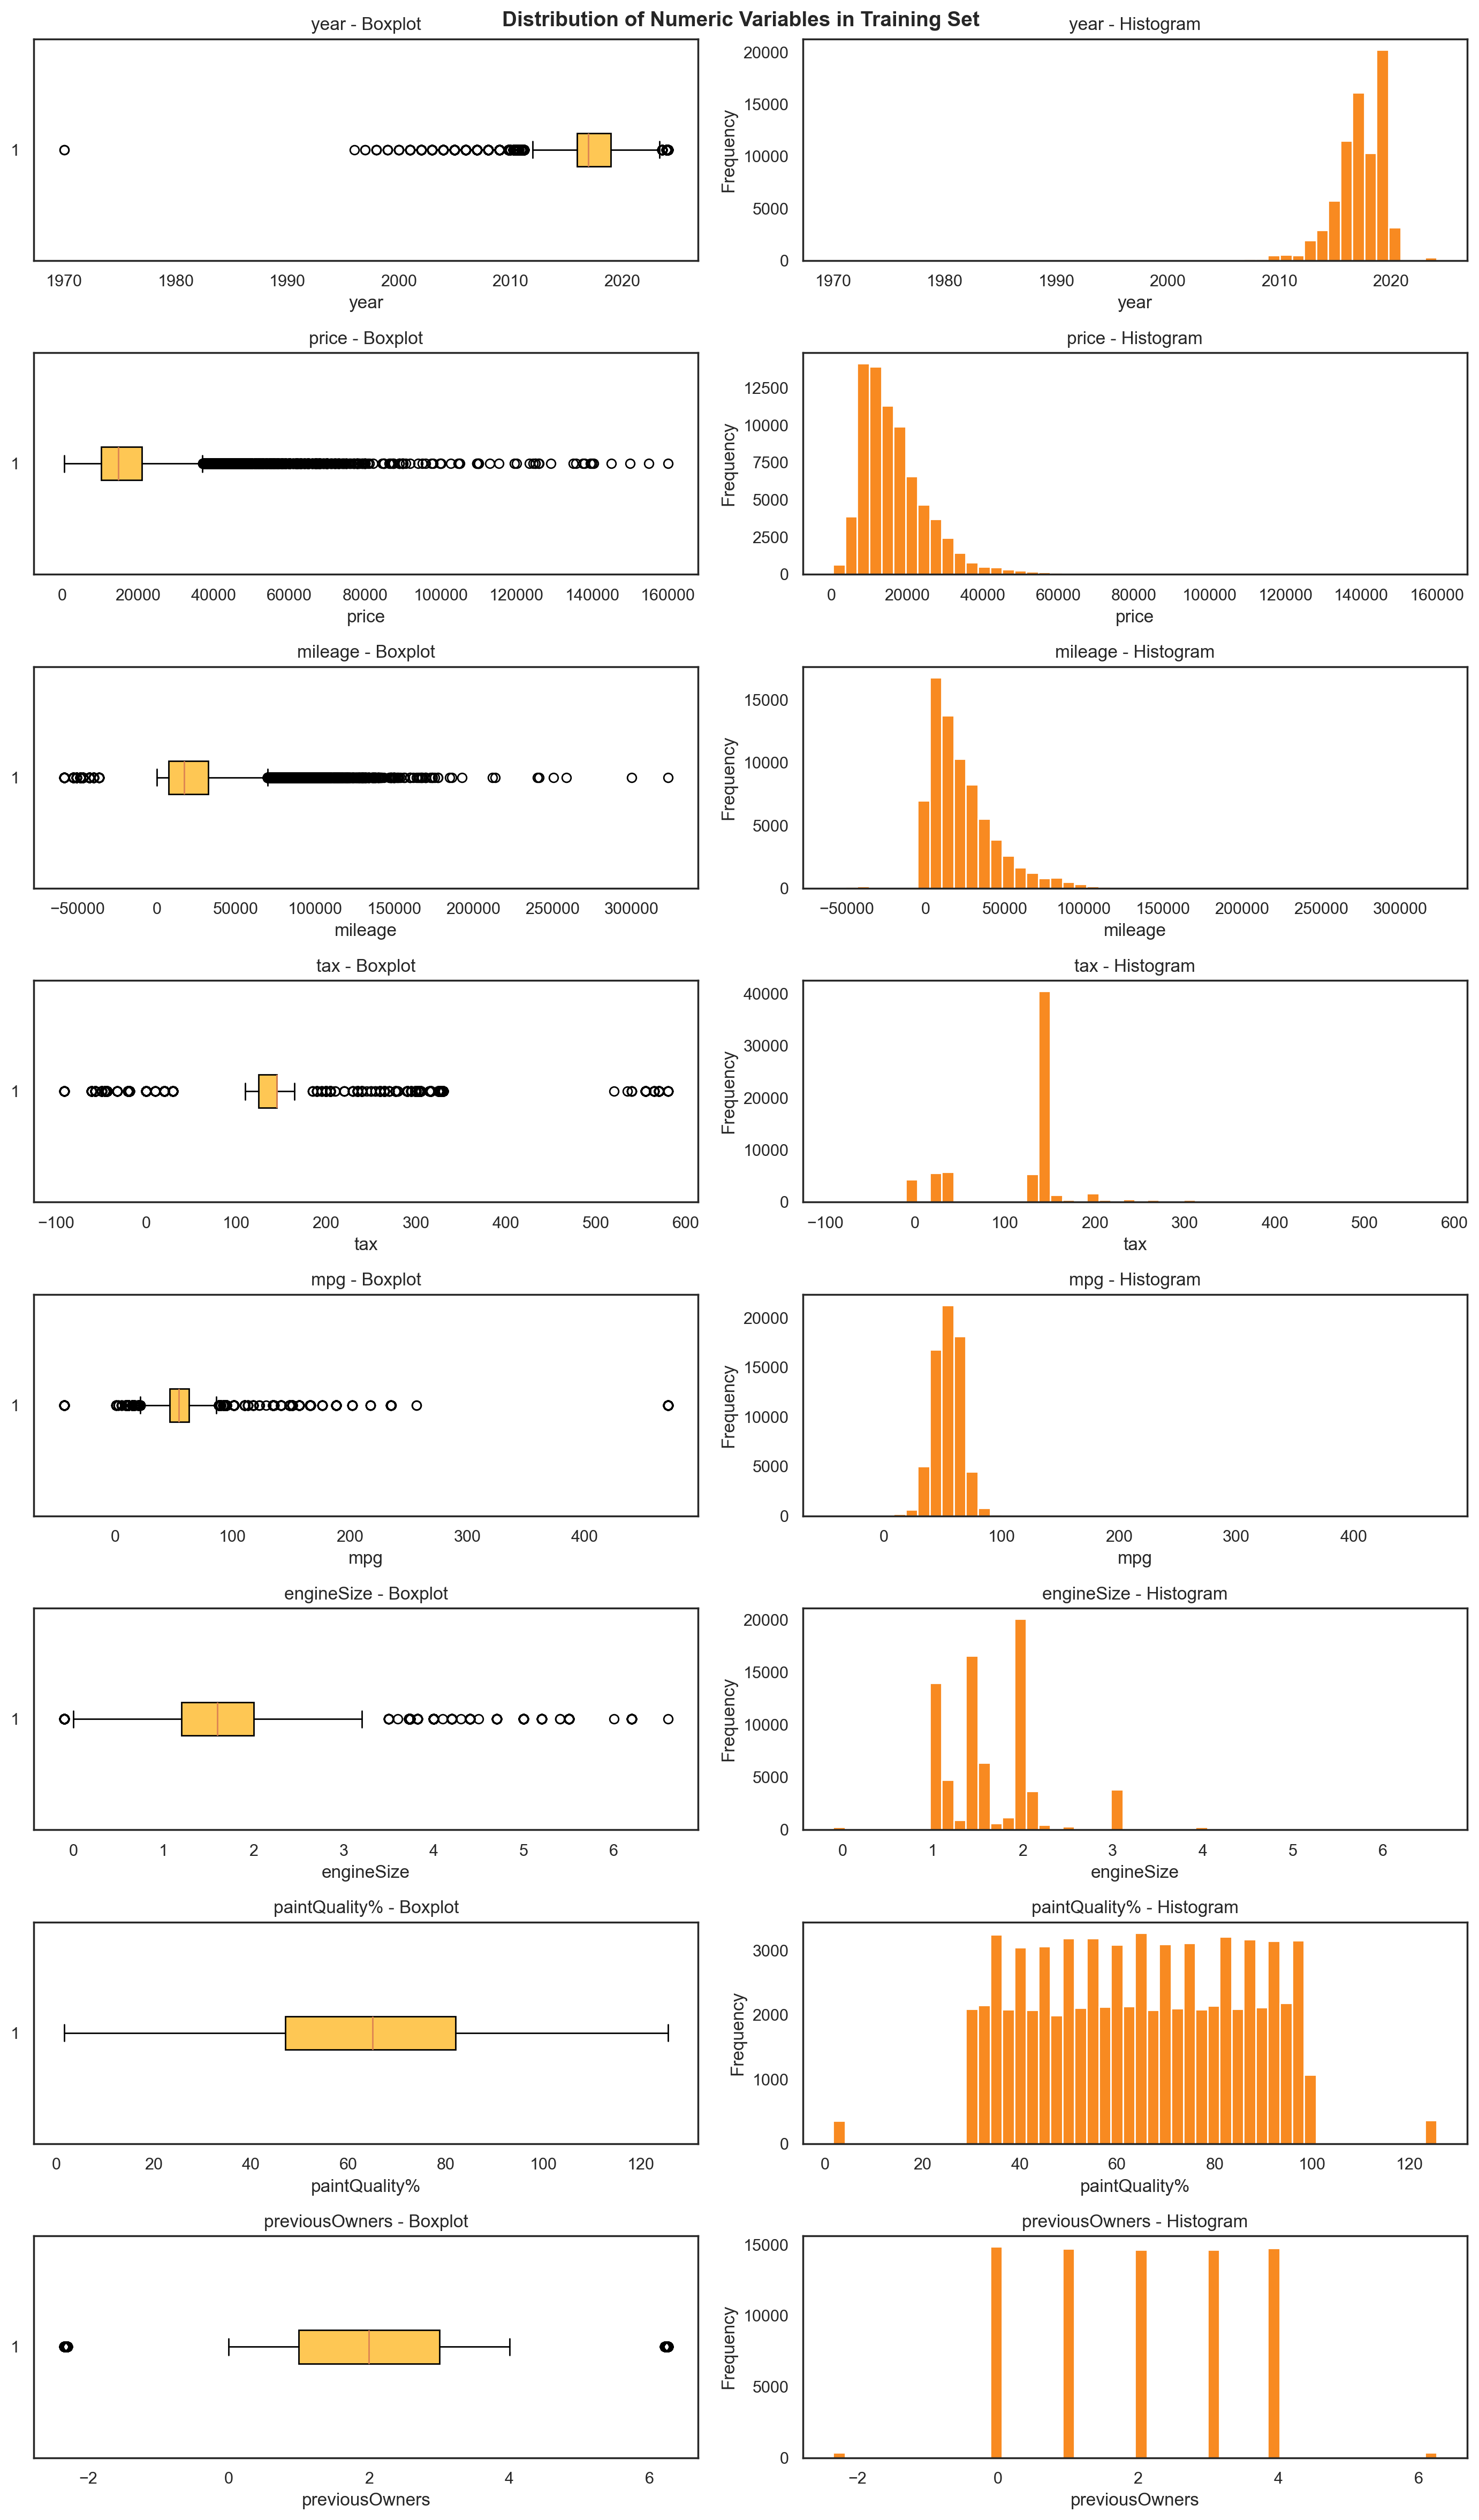

In [10]:
def plot_box_hist(df, cols, title, n_bins=50):
    """Plot boxplots and histograms for numeric variables."""
    n = len(cols)
    fig, axes = plt.subplots(n, 2, figsize=(14, 3*n))
    
    for i, col in enumerate(cols):
        # Boxplot
        axes[i, 0].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                          boxprops=dict(facecolor=palette[3]))
        axes[i, 0].set_title(f'{col} - Boxplot')
        axes[i, 0].set_xlabel(col)
        
        # Histogram
        axes[i, 1].hist(df[col].dropna(), bins=n_bins, color=palette[5], edgecolor='white')
        axes[i, 1].set_title(f'{col} - Histogram')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.suptitle(f'Distribution of Numeric Variables {title}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot numeric distributions (excluding binary variables)
plot_box_hist(car_eval, num.drop(['hasDamage']), "in Training Set")

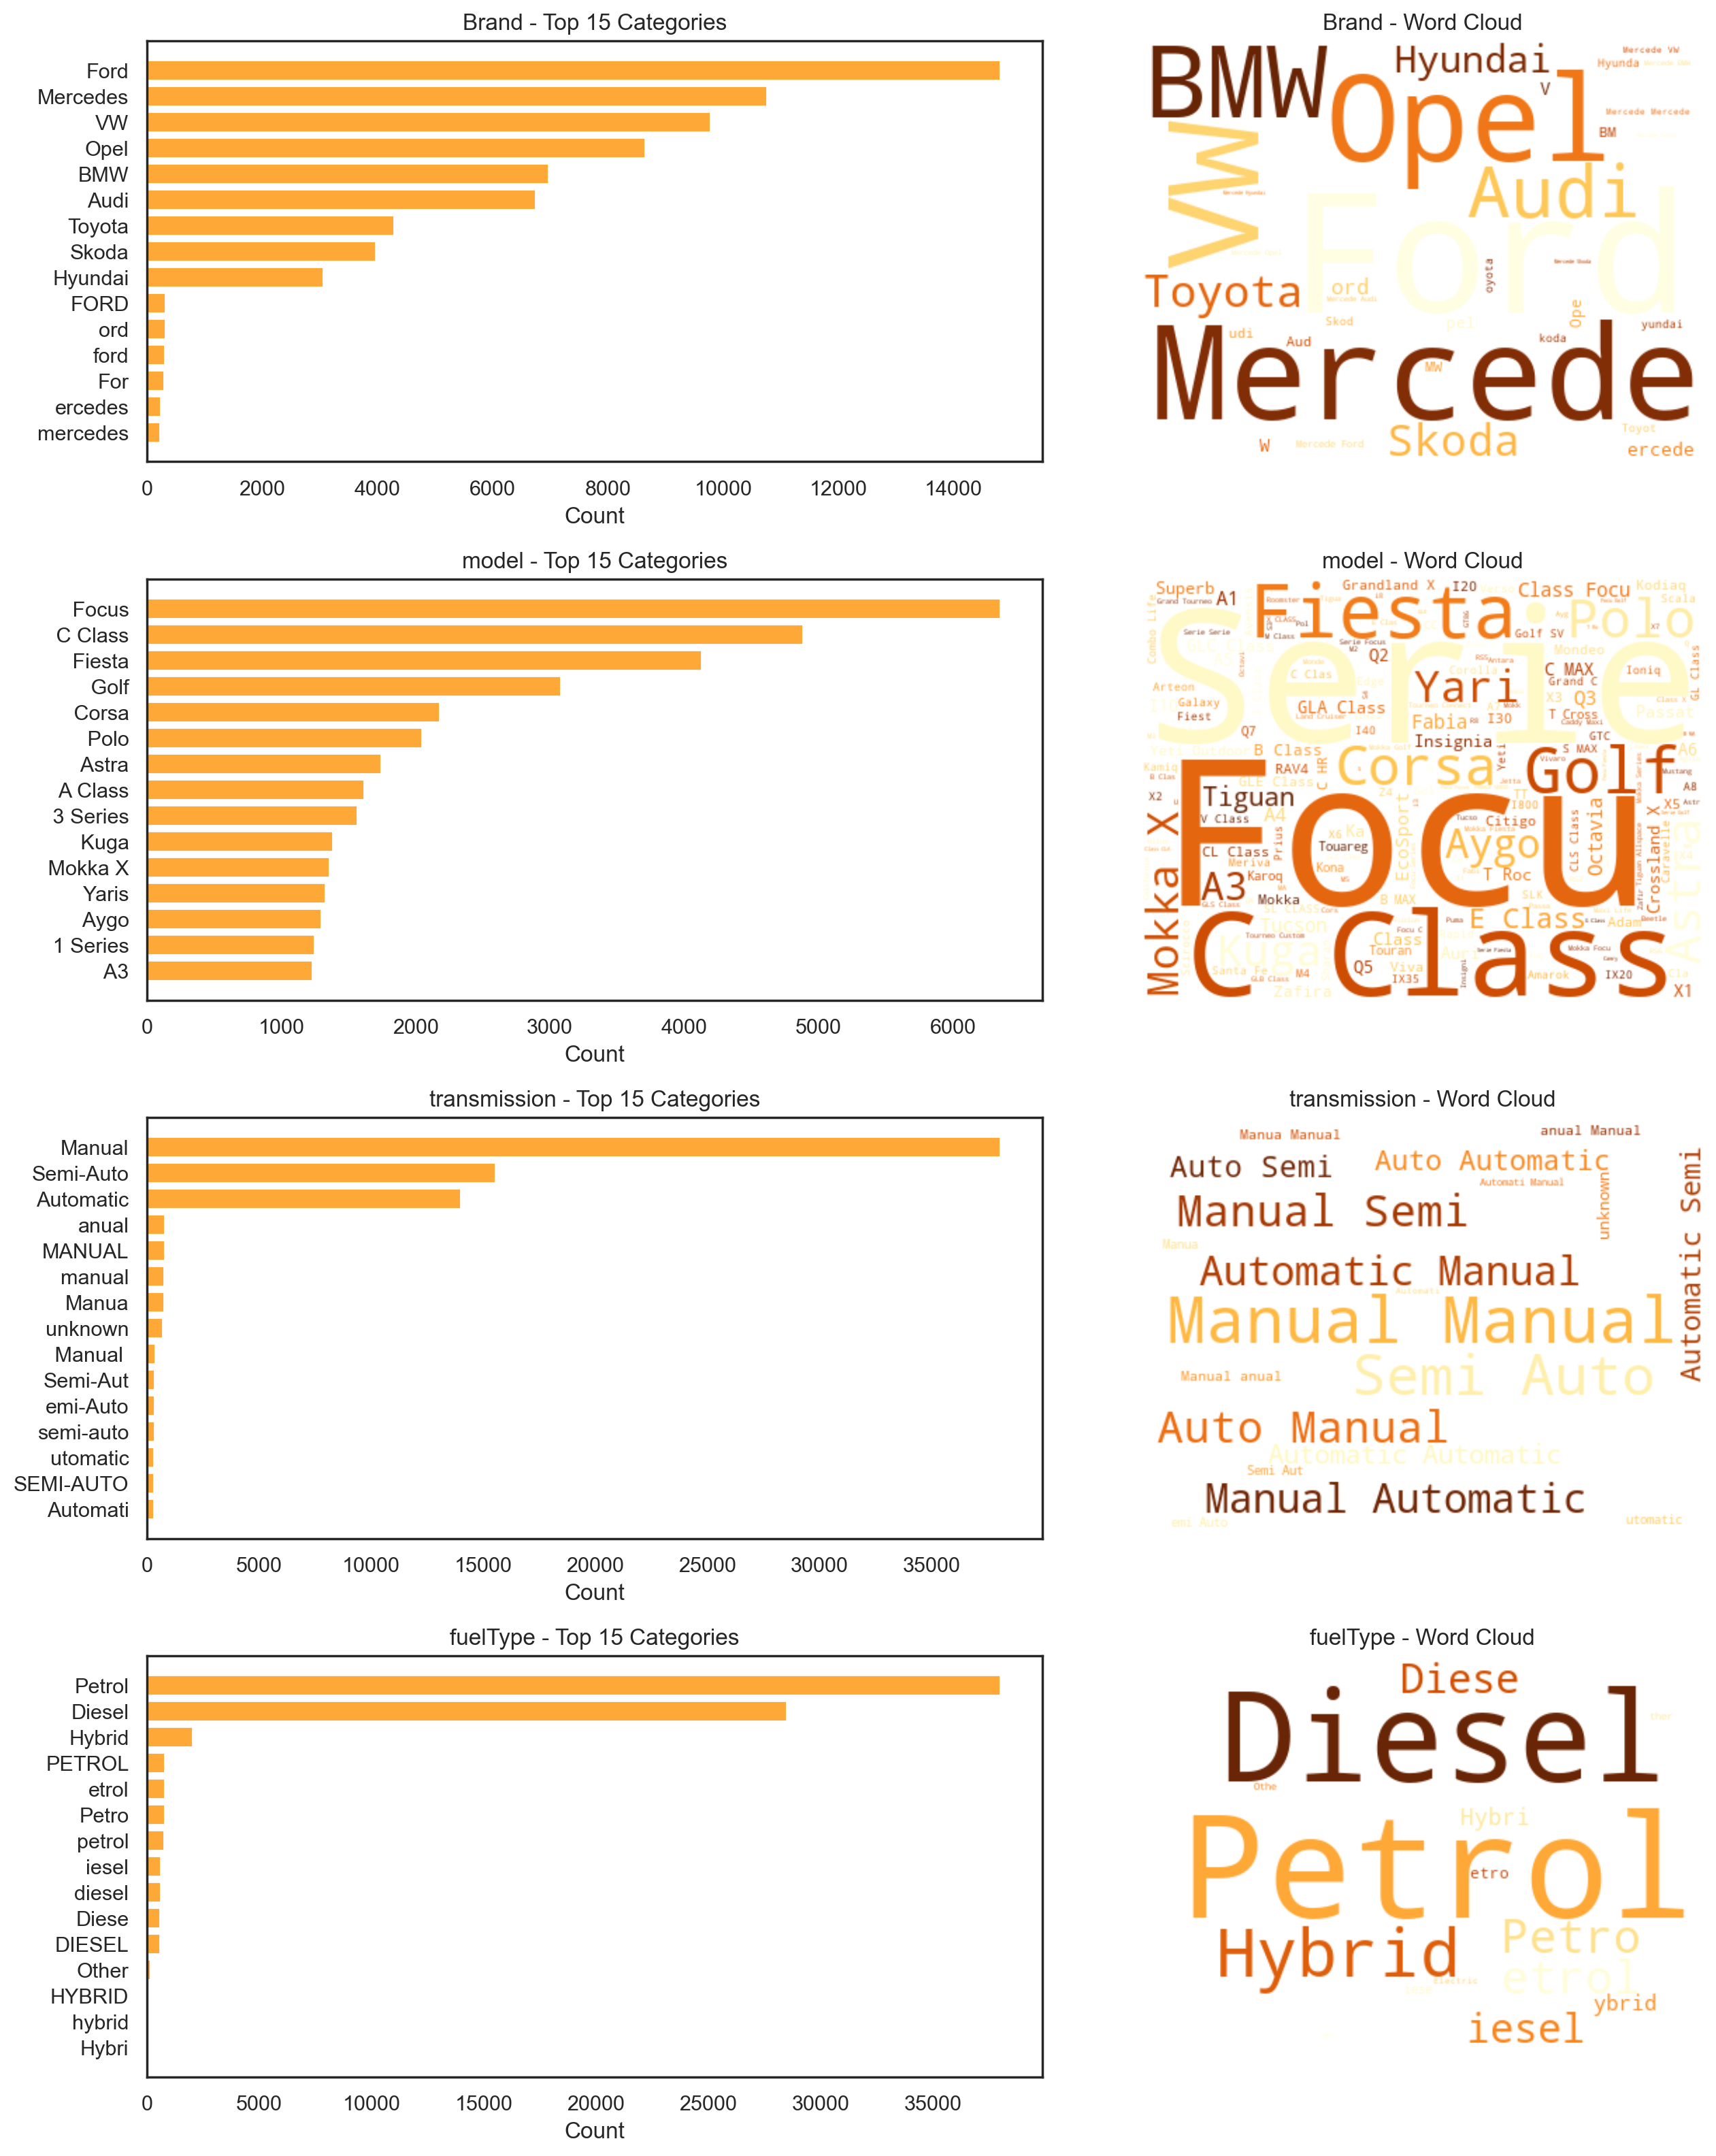

In [11]:
def plot_bar_wordcloud(df, cols):
    """Plot bar charts and word clouds for categorical variables."""
    n = len(cols)
    fig, axes = plt.subplots(n, 2, figsize=(14, 4*n))
    
    if n == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        
        # Bar chart
        axes[i, 0].barh(counts.index[:15], counts.values[:15], color=palette[4])
        axes[i, 0].set_title(f'{col} - Top 15 Categories')
        axes[i, 0].set_xlabel('Count')
        axes[i, 0].invert_yaxis()
        
        # Word cloud
        text = ' '.join(df[col].dropna().astype(str))
        wordcloud = WordCloud(width=400, height=300, background_color='white',
                             colormap='YlOrBr').generate(text)
        axes[i, 1].imshow(wordcloud, interpolation='bilinear')
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'{col} - Word Cloud')
    
    plt.tight_layout()
    plt.show()

# Plot categorical distributions
plot_bar_wordcloud(car_eval, cat)

In [12]:
def missing_data(train_df, test_df=None):
    """Display missing data summary."""
    cols = train_df.columns if test_df is None else train_df.columns.intersection(test_df.columns)
    
    result = pd.DataFrame({
        'Train n': train_df[cols].isna().sum(),
        'Train %': (train_df[cols].isna().mean() * 100).round(2)
    })
    
    if test_df is not None:
        result['Test n'] = test_df[cols].isna().sum()
        result['Test %'] = (test_df[cols].isna().mean() * 100).round(2)
    
    return result[result['Train n'] > 0].sort_values('Train %', ascending=False)

missing_data(car_eval, X_test)

,Train n,Train %,Test n,Test %
mpg,7924,10.43,3288,10.10
tax,7902,10.40,3308,10.16
hasDamage,1548,2.04,597,1.83
previousOwners,1550,2.04,597,1.83
paintQuality%,1524,2.01,625,1.92
transmission,1522,2.00,623,1.91
model,1517,2.00,650,2.00
Brand,1521,2.00,649,1.99
engineSize,1516,2.00,628,1.93
fuelType,1511,1.99,656,2.01


### 3.4 Train/Validation Split

Before proceeding with cleaning, we split the training data to ensure no data leakage.

In [13]:
# Split features and target
car_eval = car_eval.reset_index()

X = car_eval.drop(columns=['price'])
y = car_eval[['carID', 'price']]

# Train/validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Set carID as index
X_train, X_val = [d.set_index('carID') for d in (X_train, X_val)]
y_train, y_val = [d.set_index('carID') for d in (y_train, y_val)]

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

X_train: (60769, 12)
X_val: (15193, 12)
y_train: (60769, 1)
y_val: (15193, 1)


<a id='4-cleaning'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>4 | Data Cleaning</b></span>
    </h1>
</div>

### 4.1 Brand & Model Standardization

The Brand and model columns contain inconsistencies (typos, variations). We use fuzzy matching against a reference dictionary from the wheel-size API.

In [14]:
# Prepare reference dictionary
brand_model_dic_norm = brand_model_dic.copy()

# Remove problematic brands
brand_model_dic_norm = brand_model_dic_norm[
    ~brand_model_dic_norm['brand'].str.lower().str.startswith(('faw', 'gac'), na=False)
]

# Brand normalizations
brand_model_dic_norm['brand'] = brand_model_dic_norm['brand'].replace({
    'Volkswagen': 'VW',
    'Vauxhall': 'Opel'
}, regex=False)

# Add missing models manually
extra_rows = [
    {'brand': 'VW', 'model': 'Shuttle'},
    {'brand': 'VW', 'model': 'Caddy Maxi Life'},
    {'brand': 'Skoda', 'model': 'yeti outdoor'}
]
brand_model_dic_norm = pd.concat([brand_model_dic_norm, pd.DataFrame(extra_rows)], ignore_index=True)

# Model fixes
brand_model_dic_norm['model'] = brand_model_dic_norm['model'].replace({
    'Yeti': 'yeti outdoor',
    'SLK-Class': 'SLK'
}, regex=False)

# Remove problematic brands that cause confusion
brand_model_dic_norm = brand_model_dic_norm[
    ~brand_model_dic_norm['brand'].isin(['Ora', 'Chery', 'Geometry'])
]

# Normalize text (lowercase, remove special chars)
brand_model_dic_norm['Brand'] = brand_model_dic_norm['brand'].apply(utils.norm)
brand_model_dic_norm['model'] = brand_model_dic_norm['model'].apply(utils.norm)

# Remove duplicates
brand_model_dic_norm = brand_model_dic_norm.drop_duplicates(subset=['Brand', 'model'])

print(f"Reference dictionary: {len(brand_model_dic_norm)} brand-model combinations")

Reference dictionary: 5533 brand-model combinations


In [15]:
# Create normalized copies
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Normalize Brand and model in all datasets
for df in [X_train_norm, X_val_norm, X_test_norm]:
    df['Brand'] = df['Brand'].apply(utils.norm)
    df['model'] = df['model'].apply(utils.norm)

In [16]:
def clean_and_flag_data(df_to_clean):    
    """Clean Brand and model using fuzzy matching. Returns flagged DataFrame."""
    
    # Create flag columns
    flag_columns = ['multiple_models', 'multiple_models_and_brands', 
                    'multiple_brands', 'multiple_models_from_a_diff_brand']
    for col in flag_columns:
        df_to_clean[col] = None
        df_to_clean[col] = df_to_clean[col].astype('object')
    
    for index, row in df_to_clean.iterrows():
        brand = row['Brand']
        model = row['model']

        # Skip if both are missing
        if pd.isnull(brand) and pd.isnull(model):
            continue

        # Case: Brand missing, model present
        if pd.isnull(brand) and not pd.isnull(model):
            matches = utils.get_best_match(model, brand_model_dic_norm['model'])
            if len(matches) == 1:
                matched_brand = brand_model_dic_norm[brand_model_dic_norm['model'] == matches[0]]['Brand'].iloc[0]
                df_to_clean.loc[index, 'Brand'] = matched_brand
                df_to_clean.loc[index, 'model'] = matches[0]
            elif len(matches) > 1:
                matched_brands = brand_model_dic_norm[brand_model_dic_norm['model'].isin(matches)]['Brand'].unique()
                if len(matched_brands) == 1:
                    df_to_clean.loc[index, 'Brand'] = matched_brands[0]
                    df_to_clean.at[index, 'multiple_models'] = matches
                else:
                    possible_pairs = brand_model_dic_norm[brand_model_dic_norm['model'].isin(matches)][['Brand', 'model']].drop_duplicates().to_dict('records')
                    df_to_clean.at[index, 'multiple_models_and_brands'] = possible_pairs
        
        # Case: Model missing, brand present
        elif not pd.isnull(brand) and pd.isnull(model):
            matches = utils.get_best_match(brand, brand_model_dic_norm['Brand'].unique())
            if len(matches) == 1:
                df_to_clean.loc[index, 'Brand'] = matches[0]
                df_to_clean.loc[index, 'no_model'] = 1
            elif len(matches) > 1:
                df_to_clean.at[index, 'multiple_brands'] = matches

        # Case: Both present
        elif not pd.isnull(brand) and not pd.isnull(model):
            brand_matches = utils.get_best_match(brand, brand_model_dic_norm['Brand'].unique())
            if len(brand_matches) == 1:
                matched_brand = brand_matches[0]
                models_of_brand = brand_model_dic_norm[brand_model_dic_norm['Brand'] == matched_brand]['model']
                model_matches = utils.get_best_match(model, models_of_brand)
                
                if len(model_matches) == 1:
                    df_to_clean.loc[index, 'Brand'] = matched_brand
                    df_to_clean.loc[index, 'model'] = model_matches[0]
                elif len(model_matches) > 1:
                    df_to_clean.loc[index, 'Brand'] = matched_brand
                    df_to_clean.at[index, 'multiple_models'] = model_matches
                else:
                    # Try matching model across all brands
                    all_model_matches = utils.get_best_match(model, brand_model_dic_norm['model'])
                    if len(all_model_matches) == 1:
                        new_brand = brand_model_dic_norm[brand_model_dic_norm['model'] == all_model_matches[0]]['Brand'].iloc[0]
                        df_to_clean.loc[index, 'Brand'] = new_brand
                        df_to_clean.loc[index, 'model'] = all_model_matches[0]
                    elif len(all_model_matches) > 1:
                        df_to_clean.loc[index, 'Brand'] = matched_brand
                        df_to_clean.at[index, 'multiple_models_from_a_diff_brand'] = all_model_matches
                    else:
                        df_to_clean.loc[index, 'Brand'] = matched_brand
                        df_to_clean.loc[index, 'no_model'] = 1
            elif len(brand_matches) > 1:
                all_model_matches = utils.get_best_match(model, brand_model_dic_norm['model'])
                if len(all_model_matches) == 1:
                    brand_of_model = brand_model_dic_norm[brand_model_dic_norm['model'] == all_model_matches[0]]['Brand'].iloc[0]
                    df_to_clean.loc[index, 'Brand'] = brand_of_model
                    df_to_clean.loc[index, 'model'] = all_model_matches[0]
                elif len(all_model_matches) > 1:
                    possible_pairs = brand_model_dic_norm[brand_model_dic_norm['model'].isin(all_model_matches)][['Brand', 'model']].drop_duplicates().to_dict('records')
                    df_to_clean.at[index, 'multiple_models_and_brands'] = possible_pairs
                else:
                    df_to_clean.at[index, 'multiple_brands'] = brand_matches
            else:
                # Brand not found, try model
                model_matches = utils.get_best_match(model, brand_model_dic_norm['model'])
                if len(model_matches) == 1:
                    brand_of_model = brand_model_dic_norm[brand_model_dic_norm['model'] == model_matches[0]]['Brand'].iloc[0]
                    df_to_clean.loc[index, 'Brand'] = brand_of_model
                    df_to_clean.loc[index, 'model'] = model_matches[0]
                elif len(model_matches) > 1:
                    matched_brands = brand_model_dic_norm[brand_model_dic_norm['model'].isin(model_matches)]['Brand'].unique()
                    if len(matched_brands) == 1:
                        df_to_clean.loc[index, 'Brand'] = matched_brands[0]
                        df_to_clean.at[index, 'multiple_models'] = model_matches
                    else:
                        possible_pairs = brand_model_dic_norm[brand_model_dic_norm['model'].isin(model_matches)][['Brand', 'model']].drop_duplicates().to_dict('records')
                        df_to_clean.at[index, 'multiple_models_and_brands'] = possible_pairs
                else:
                    df_to_clean.loc[index, 'no_brand_and_no_model'] = 1

    return df_to_clean

# Apply cleaning function
X_train_norm = clean_and_flag_data(X_train_norm)
X_val_norm = clean_and_flag_data(X_val_norm)
X_test_norm = clean_and_flag_data(X_test_norm)

print("Brand/Model cleaning complete")

Brand/Model cleaning complete


In [17]:
# Resolve multiple_models flag by random selection
def resolve_multiple_models(df_to_resolve):
    random.seed(RANDOM_STATE)
    indices = df_to_resolve[df_to_resolve['multiple_models'].notnull()].index
    
    for index in indices:
        possible_models = df_to_resolve.at[index, 'multiple_models']
        if possible_models:
            df_to_resolve.at[index, 'model'] = random.choice(possible_models)
            df_to_resolve.at[index, 'multiple_models'] = None
    
    return df_to_resolve

for d in [X_train_norm, X_val_norm, X_test_norm]:
    d = resolve_multiple_models(d)

# Drop the flag column
for d in [X_train_norm, X_val_norm, X_test_norm]:
    d.drop(columns=['multiple_models'], inplace=True, errors='ignore')

In [18]:
# Handle no_model cases
for d in [X_train_norm, X_val_norm, X_test_norm]:
    if 'no_model' in d.columns:
        mask = (d['no_model'] == 1) & (d['model'].isna())
        d.loc[mask, 'model'] = 'unknown'
        d.loc[mask, 'no_model'] = 0
        d.drop(columns=['no_model'], inplace=True, errors='ignore')

In [19]:
# Resolve multiple_models_and_brands by selecting familiar brands
existing_brands = X_train_norm['Brand'].dropna().unique().tolist()

def resolve_multiple_models_and_brands(df_to_resolve):
    random.seed(RANDOM_STATE)
    indices = df_to_resolve[df_to_resolve['multiple_models_and_brands'].notnull()].index

    for index in indices:
        possible_pairs = df_to_resolve.at[index, 'multiple_models_and_brands']
        if not possible_pairs:
            continue

        familiar_options = [p for p in possible_pairs if p['Brand'] in existing_brands]
        
        if len(familiar_options) == 1:
            chosen = familiar_options[0]
        elif len(familiar_options) > 1:
            chosen = random.choice(familiar_options)
        else:
            continue
            
        df_to_resolve.at[index, 'Brand'] = chosen['Brand']
        df_to_resolve.at[index, 'model'] = chosen['model']
        df_to_resolve.at[index, 'multiple_models_and_brands'] = None
            
    return df_to_resolve

for d in [X_train_norm, X_val_norm, X_test_norm]:
    d = resolve_multiple_models_and_brands(d)

# Drop remaining flag columns
flag_cols = ['multiple_models_and_brands', 'multiple_brands', 
             'multiple_models_from_a_diff_brand', 'no_brand_and_no_model', 'brand_model_inconsistent']
for d in [X_train_norm, X_val_norm, X_test_norm]:
    d.drop(columns=flag_cols, inplace=True, errors='ignore')

In [20]:
# Replace X_train, X_val, X_test with normalized versions
X_train = X_train_norm.copy()
X_val = X_val_norm.copy()
X_test = X_test_norm.copy()

# Handle unseen models in validation/test
train_models = set(X_train['model'].unique())
for df, name in [(X_val, 'Validation'), (X_test, 'Test')]:
    unseen = set(df['model'].unique()) - train_models
    if unseen:
        print(f"Unseen models in {name}: {len(unseen)}")
        df.loc[df['model'].isin(unseen), 'model'] = 'other'

print(f"\nUnique brands in training: {X_train['Brand'].nunique()}")
print(f"Unique models in training: {X_train['model'].nunique()}")

Unseen models in Validation: 4
Unseen models in Test: 9

Unique brands in training: 9
Unique models in training: 189


### 4.2 Numeric Variables

In [21]:
# Clean numeric variables
for df in [X_train, X_val, X_test]:
    # Year: take absolute value, cap at 2020
    df['year'] = df['year'].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
    df.loc[df['year'] > 2020, 'year'] = 2020
    
    # Mileage: take absolute value
    df['mileage'] = df['mileage'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Tax: take absolute value
    df['tax'] = df['tax'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # MPG: take absolute value
    df['mpg'] = df['mpg'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Engine Size: 0 values are missing
    df.loc[df['engineSize'] == 0, 'engineSize'] = np.nan
    df['engineSize'] = df['engineSize'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Paint Quality: clip to [0, 100]
    df['paintQuality%'] = pd.to_numeric(df['paintQuality%'], errors='coerce').clip(0, 100)
    
    # Previous Owners: take absolute value
    df['previousOwners'] = df['previousOwners'].apply(lambda x: abs(int(x)) if pd.notnull(x) else np.nan)

print("✅ Numeric variables cleaned")

✅ Numeric variables cleaned


### 4.3 Categorical Variables

In [22]:
def correct_categorical_value(input_value, valid_values, min_score=0.6, fallback='unknown'):
    """Correct categorical value using fuzzy matching."""
    normalized = utils.norm(input_value)
    matches = utils.get_best_match(normalized, valid_values, min_score=min_score)
    
    if isinstance(matches, list) and len(matches) == 1:
        return matches[0]
    elif isinstance(matches, list) and len(matches) > 1:
        return None  # Tie
    return fallback

# Define valid values
transmission_valid = [utils.norm(x) for x in ['Manual', 'Automatic', 'Semi-Auto', 'Other']]
fueltype_valid = [utils.norm(x) for x in ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other']]

# Apply corrections
for df in [X_train, X_val, X_test]:
    df['transmission'] = df['transmission'].apply(lambda x: correct_categorical_value(x, transmission_valid))
    df['fuelType'] = df['fuelType'].apply(lambda x: correct_categorical_value(x, fueltype_valid))

print("Transmission values:", X_train['transmission'].unique())
print("Fuel type values:", X_train['fuelType'].unique())

Transmission values: ['manual' 'semi auto' 'automatic' 'unknown' 'other']
Fuel type values: ['diesel' 'petrol' 'hybrid' 'unknown' 'other' 'electric']


In [23]:
# Remove duplicates after cleaning
before = len(X_train)
X_train = X_train.drop_duplicates(keep='last')
y_train = y_train.loc[X_train.index]
print(f"Removed {before - len(X_train)} duplicates from training set")

# Fill remaining NaN in Brand/model with 'unknown'
for df in [X_train, X_val, X_test]:
    df['Brand'] = df['Brand'].fillna('unknown').replace('None', 'unknown')
    df['model'] = df['model'].fillna('unknown').replace('None', 'unknown')

Removed 5 duplicates from training set


<a id='5-missing'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>5 | Missing Data Treatment</b></span>
    </h1>
</div>

### 5.1 MAR/MCAR Analysis

We test whether missing data is **Missing Completely At Random (MCAR)** or **Missing At Random (MAR)** to choose the appropriate imputation strategy.

In [24]:
def test_missingness(df, target, num_cols):
    """
    Test if missingness in target column is related to other variables.
    Uses t-tests for numeric and chi-square for categorical predictors.
    """
    df = df.copy()
    miss_col = target + '_missing'
    df[miss_col] = df[target].isna().astype(int)
    
    results = []
    
    # Numeric predictors: t-tests
    for col in num_cols:
        if col != target and col in df.columns:
            group0 = df.loc[df[miss_col] == 0, col].dropna()
            group1 = df.loc[df[miss_col] == 1, col].dropna()
            if len(group0) > 1 and len(group1) > 1:
                _, p = ttest_ind(group0, group1, equal_var=False)
                results.append((target, col, 't-test', p))
    
    # Categorical predictors: chi-square
    cat_cols = df.select_dtypes(exclude='number').columns
    for col in cat_cols:
        if col != miss_col:
            table = pd.crosstab(df[col], df[miss_col])
            if table.shape[0] > 1:
                _, p, _, _ = chi2_contingency(table)
                results.append((target, col, 'chi-square', p))
    
    return pd.DataFrame(results, columns=['Target', 'Variable', 'Test', 'p_value'])

In [25]:
# Join with price for analysis
X_train_with_price = X_train.join(y_train)

# Identify variables with missing values
vars_with_missing = [col for col in X_train.columns if X_train[col].isna().sum() > 0]
num_cols = X_train_with_price.select_dtypes('number').columns

# Test each variable
all_results = []
for var in vars_with_missing:
    results = test_missingness(X_train_with_price, var, num_cols)
    sig_vars = results[results['p_value'] < 0.05]['Variable'].tolist()
    status = "MAR" if len(sig_vars) > 0 else "MCAR"
    all_results.append({
        'Variable': var,
        'Missing_n': X_train[var].isna().sum(),
        'Missing_%': round(X_train[var].isna().mean() * 100, 2),
        'Status': status,
        'Related_to': ', '.join(sig_vars[:5]) + ('...' if len(sig_vars) > 5 else '') if sig_vars else '—'
    })

summary = pd.DataFrame(all_results).sort_values('Missing_%', ascending=False)
summary

,Variable,Missing_n,Missing_%,Status,Related_to
3,mpg,6345,10.44,MAR,"year, engineSize, price, Brand, model..."
2,tax,6308,10.38,MAR,"year, mpg, engineSize, price, Brand..."
4,engineSize,1352,2.23,MAR,"mpg, model, transmission"
7,hasDamage,1264,2.08,MCAR,—
6,previousOwners,1258,2.07,MCAR,—
5,paintQuality%,1231,2.03,MCAR,—
0,year,1220,2.01,MAR,fuelType
1,mileage,1150,1.89,MCAR,—


### 5.2 Imputation Strategy

- **MCAR variables**: Simple imputation (mean/median/mode)
- **MAR variables**: KNN Imputation

In [26]:
# MCAR variables: simple imputation
paint_mean = X_train['paintQuality%'].mean()
owners_median = X_train['previousOwners'].median()
mileage_median = X_train['mileage'].median()
damage_median = X_train['hasDamage'].median()

for df in [X_train, X_val, X_test]:
    df['paintQuality%'] = pd.to_numeric(df['paintQuality%'], errors='coerce').fillna(paint_mean)
    df['previousOwners'] = pd.to_numeric(df['previousOwners'], errors='coerce').fillna(owners_median)
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce').fillna(mileage_median)
    df['hasDamage'] = pd.to_numeric(df['hasDamage'], errors='coerce').fillna(damage_median)

print("✅ MCAR variables imputed")

✅ MCAR variables imputed


In [27]:
# MAR variables: KNN imputation
numeric_cols = X_train.select_dtypes(include='number').columns.tolist()

# Scale, impute, inverse scale
scaler = MinMaxScaler()
knn_imputer = KNNImputer(n_neighbors=5)

datasets = {'train': X_train, 'val': X_val, 'test': X_test}

# Scale
scaled = {}
for name, df in datasets.items():
    if name == 'train':
        scaled[name] = scaler.fit_transform(df[numeric_cols])
    else:
        scaled[name] = scaler.transform(df[numeric_cols])

# Impute
imputed_scaled = {}
for name, data in scaled.items():
    if name == 'train':
        imputed_scaled[name] = knn_imputer.fit_transform(data)
    else:
        imputed_scaled[name] = knn_imputer.transform(data)

# Inverse scale and update DataFrames
for name, df in datasets.items():
    imputed_data = scaler.inverse_transform(imputed_scaled[name])
    imputed_df = pd.DataFrame(imputed_data, index=df.index, columns=numeric_cols)
    df[numeric_cols] = imputed_df
    
    # Round discrete variables
    for col in ['year', 'previousOwners']:
        if col in df.columns:
            df[col] = df[col].round().astype(int)

print("✅ MAR variables imputed with KNN")
print(f"Remaining missing values: {X_train.isna().sum().sum()}")

✅ MAR variables imputed with KNN
Remaining missing values: 0


<a id='6-outliers'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>6 | Outlier Detection</b></span>
    </h1>
</div>

In [28]:
def compare_outlier_detection(df, columns, iqr_factor=1.5, mad_threshold=3.5):
    """Compare IQR and MAD outlier detection methods."""
    results = []
    
    for col in columns:
        if col not in df.columns:
            continue
        data = df[col].dropna()
        
        # IQR method
        Q1, Q3 = data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        iqr_outliers = ((data < Q1 - iqr_factor*IQR) | (data > Q3 + iqr_factor*IQR)).sum()
        
        # MAD method
        median = data.median()
        mad = (data - median).abs().median()
        if mad > 0:
            mad_outliers = ((data - median).abs() > mad_threshold * mad).sum()
        else:
            mad_outliers = (data != median).sum()
        
        results.append({
            'Column': col,
            'IQR_outliers': iqr_outliers,
            'IQR_%': round(iqr_outliers / len(df) * 100, 2),
            'MAD_outliers': mad_outliers,
            'MAD_%': round(mad_outliers / len(df) * 100, 2)
        })
    
    return pd.DataFrame(results).set_index('Column')

# Analyze outliers
num_for_outliers = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']
compare_outlier_detection(X_train, num_for_outliers)

,IQR_outliers,IQR_%,MAD_outliers,MAD_%
Column,,,,
year,1338,2.20,3264,5.37
mileage,2715,4.47,4450,7.32
tax,17494,28.79,23120,38.05
mpg,1032,1.70,1689,2.78
engineSize,502,0.83,3708,6.10
paintQuality%,0,0.00,288,0.47
previousOwners,0,0.00,286,0.47


We keep outliers for now as tree-based models are robust to outliers. Extreme values will be handled implicitly during modeling.

<a id='7-features'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>7 | Feature Engineering</b></span>
    </h1>
</div>

### 7.1 Collapse Rare Models

In [29]:
def fit_keep_models_per_brand(train, brand_col='Brand', model_col='model', min_count=20, min_freq=0.01):
    tmp = train[[brand_col, model_col]].copy()
    tmp = tmp[~tmp[brand_col].isin(['unknown'])]
    tmp = tmp[~tmp[model_col].isin(['unknown'])]

    g = tmp.groupby([brand_col, model_col]).size().rename('n').reset_index()
    g['brand_total'] = g.groupby(brand_col)['n'].transform('sum')
    g['freq'] = g['n'] / g['brand_total']

    keep = g.loc[(g['n'] >= min_count) & (g['freq'] >= min_freq), [brand_col, model_col]].copy()
    keep['keep'] = True
    return keep

def collapse_rare_models(df, keep_table, brand_col='Brand', model_col='model', other_label='other'):
    original_index = df.index
    out = df.copy()
    out = out.merge(keep_table, how='left', on=[brand_col, model_col])
    
    mask = (
        out['keep'].fillna(False) == False
    ) & (
        ~out[brand_col].isin(['unknown', None])
    ) & (
        ~out[model_col].isin(['unknown', None])
    )
    out.loc[mask, model_col] = other_label
    out.index = original_index
    out.drop(columns=['keep'], errors='ignore', inplace=True)
    return out

keep_tbl = fit_keep_models_per_brand(X_train, 'Brand', 'model', min_count=20, min_freq=0.01)
X_train = collapse_rare_models(X_train, keep_tbl, 'Brand', 'model')
X_val = collapse_rare_models(X_val, keep_tbl, 'Brand', 'model')
X_test = collapse_rare_models(X_test, keep_tbl, 'Brand', 'model')

print(f"Models collapsed to 'other': {(X_train['model'] == 'other').sum()} ({(X_train['model'] == 'other').mean()*100:.1f}%)")

Models collapsed to 'other': 1964 (3.2%)


### 7.2 Create New Features

In [30]:
# Create engineered features
for d in [X_train, X_val, X_test]:
    # Age
    d['age'] = 2020 - d['year']
    
    # Miles per year
    d['miles_per_year'] = d['mileage'] / (d['age'] + 1)
    
    # Brand-model combination
    d['brand_model'] = d['Brand'] + '_' + d['model']

print(f"Unique brand_model combinations: {X_train['brand_model'].nunique()}")

Unique brand_model combinations: 124


### 7.3 Test Feature Independence

In [31]:
# Test independence of categorical variables
def test_independence(X_1, X_2, alpha=0.05):
    data = pd.concat([X_1, X_2], axis=1).dropna()
    table = pd.crosstab(data.iloc[:, 0], data.iloc[:, 1])
    _, p, _, _ = stats.chi2_contingency(table.values)
    
    if p < alpha:
        return f"{X_1.name} ↔ {X_2.name}: DEPENDENT (p={p:.4f})"
    return f"{X_1.name} ↔ {X_2.name}: INDEPENDENT (p={p:.4f})"

X_train_cat = X_train.select_dtypes(exclude='number').copy()
X_train_cat['hasDamage'] = X_train['hasDamage']

for x1, x2 in combinations(X_train_cat.columns, 2):
    print(test_independence(X_train_cat[x1], X_train_cat[x2]))

Brand ↔ model: DEPENDENT (p=0.0000)
Brand ↔ transmission: DEPENDENT (p=0.0000)
Brand ↔ fuelType: DEPENDENT (p=0.0000)
Brand ↔ brand_model: DEPENDENT (p=0.0000)
Brand ↔ hasDamage: INDEPENDENT (p=1.0000)
model ↔ transmission: DEPENDENT (p=0.0000)
model ↔ fuelType: DEPENDENT (p=0.0000)
model ↔ brand_model: DEPENDENT (p=0.0000)
model ↔ hasDamage: INDEPENDENT (p=1.0000)
transmission ↔ fuelType: DEPENDENT (p=0.0000)
transmission ↔ brand_model: DEPENDENT (p=0.0000)
transmission ↔ hasDamage: INDEPENDENT (p=1.0000)
fuelType ↔ brand_model: DEPENDENT (p=0.0000)
fuelType ↔ hasDamage: INDEPENDENT (p=1.0000)
brand_model ↔ hasDamage: INDEPENDENT (p=1.0000)


In [32]:
# Drop redundant columns
for d in [X_train, X_val, X_test]:
    d.drop(columns=['model', 'year'], errors='ignore', inplace=True)

print(f"Features after engineering: {X_train.shape[1]}")
print(f"Columns: {X_train.columns.tolist()}")

Features after engineering: 13
Columns: ['Brand', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage', 'age', 'miles_per_year', 'brand_model']


<a id='8-encoding'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>8 | Encoding & Scaling</b></span>
    </h1>
</div>

### 8.1 Frequency Encoding (High Cardinality)

In [33]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Separate high and low cardinality
high_cardinality_cols = ['Brand', 'brand_model']
low_cardinality_cols = [c for c in categorical_cols if c not in high_cardinality_cols]

Categorical columns: ['Brand', 'transmission', 'fuelType', 'brand_model']


In [34]:
# Frequency encoding for high-cardinality columns
X_train_processed = X_train.copy()
X_val_processed = X_val.copy()
X_test_processed = X_test.copy()

frequency_maps = {}
for col in high_cardinality_cols:
    freq_map = X_train[col].value_counts(normalize=True).to_dict()
    frequency_maps[col] = freq_map
    
    new_col = f'{col}_freq_enc'
    X_train_processed[new_col] = X_train[col].map(freq_map)
    X_val_processed[new_col] = X_val[col].apply(lambda x: freq_map.get(x, 0))
    X_test_processed[new_col] = X_test[col].apply(lambda x: freq_map.get(x, 0))

for df in [X_train_processed, X_val_processed, X_test_processed]:
    df.drop(columns=high_cardinality_cols, inplace=True, errors='ignore')

print("✅ Frequency encoding applied")

✅ Frequency encoding applied


### 8.2 One-Hot Encoding (Low Cardinality)

In [35]:
# One-hot encoding for low-cardinality columns
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe.fit(X_train[low_cardinality_cols])

ohe_train = pd.DataFrame(ohe.transform(X_train[low_cardinality_cols]), 
                         columns=ohe.get_feature_names_out(), index=X_train.index)
ohe_val = pd.DataFrame(ohe.transform(X_val[low_cardinality_cols]), 
                       columns=ohe.get_feature_names_out(), index=X_val.index)
ohe_test = pd.DataFrame(ohe.transform(X_test[low_cardinality_cols]), 
                        columns=ohe.get_feature_names_out(), index=X_test.index)

for df in [X_train_processed, X_val_processed, X_test_processed]:
    df.drop(columns=low_cardinality_cols, inplace=True, errors='ignore')

X_train_final = pd.concat([X_train_processed, ohe_train], axis=1)
X_val_final = pd.concat([X_val_processed, ohe_val], axis=1)
X_test_final = pd.concat([X_test_processed, ohe_test], axis=1)

print(f"Shape after encoding: {X_train_final.shape}")

Shape after encoding: (60764, 20)


### 8.3 Scaling

In [36]:
# Final scaling with RobustScaler
scaler = RobustScaler()

X_train_final = pd.DataFrame(scaler.fit_transform(X_train_final), 
                              columns=X_train_final.columns, index=X_train_final.index)
X_val_final = pd.DataFrame(scaler.transform(X_val_final), 
                            columns=X_val_final.columns, index=X_val_final.index)
X_test_final = pd.DataFrame(scaler.transform(X_test_final), 
                             columns=X_test_final.columns, index=X_test_final.index)

print("✅ RobustScaler applied")

✅ RobustScaler applied


<a id='9-export'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>9 | Export Preprocessed Data</b></span>
    </h1>
</div>

In [37]:
# Final summary
print("="*60)
print("PREPROCESSING COMPLETE")
print("="*60)
print(f"\nTraining set: {X_train_final.shape}")
print(f"Validation set: {X_val_final.shape}")
print(f"Test set: {X_test_final.shape}")
print(f"\nTotal features: {X_train_final.shape[1]}")
print(f"\nFeature names:")
print(X_train_final.columns.tolist())

PREPROCESSING COMPLETE

Training set: (60764, 20)
Validation set: (15193, 20)
Test set: (32567, 20)

Total features: 20

Feature names:
['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage', 'age', 'miles_per_year', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual', 'transmission_other', 'transmission_semi auto', 'transmission_unknown', 'fuelType_electric', 'fuelType_hybrid', 'fuelType_other', 'fuelType_petrol', 'fuelType_unknown']


In [38]:
# Export to parquet files
X_train_final.reset_index().to_parquet('./project_data/X_train_final.parquet', index=False)
X_val_final.reset_index().to_parquet('./project_data/X_val_final.parquet', index=False)
X_test_final.reset_index().to_parquet('./project_data/X_test_final.parquet', index=False)

y_train.reset_index().to_parquet('./project_data/y_train.parquet', index=False)
y_val.reset_index().to_parquet('./project_data/y_val.parquet', index=False)

print("✅ Data exported to parquet files")
print("\nFiles created:")
print("  • X_train_final.parquet")
print("  • X_val_final.parquet")
print("  • X_test_final.parquet")
print("  • y_train.parquet")
print("  • y_val.parquet")

✅ Data exported to parquet files

Files created:
  • X_train_final.parquet
  • X_val_final.parquet
  • X_test_final.parquet
  • y_train.parquet
  • y_val.parquet
